## Análisis Prescriptivo: Simulación de la demanda

El análisis prescriptivo de simulación de la demanda es una técnica de análisis de datos que se utiliza para predecir la demanda futura de un producto o servicio mediante la simulación de diferentes escenarios y variables. Este enfoque se basa en la idea de que el comportamiento del consumidor y la demanda de un producto pueden ser modelados y simulados utilizando técnicas estadísticas y de aprendizaje automático.

En este tipo de análisis, se utiliza un modelo matemático para simular diferentes situaciones y escenarios, y para predecir el impacto que diferentes factores pueden tener en la demanda. Estos factores pueden incluir cambios en el precio, la calidad del producto, las condiciones del mercado, la publicidad y la promoción, entre otros.

La simulación de la demanda puede ayudar a las empresas a tomar decisiones informadas sobre la producción y la estrategia de precios de sus productos o servicios. Por ejemplo, puede ayudar a determinar el precio óptimo para maximizar la ganancia o a identificar los factores que tienen el mayor impacto en la demanda del producto.

En resumen, el análisis prescriptivo de simulación de la demanda es una técnica avanzada de análisis de datos que permite a las empresas predecir la demanda futura de sus productos o servicios y tomar decisiones informadas basadas en diferentes escenarios y variables.

### Carga de las librerías de python necesarias

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

### Extracción de los datos desde SQL Server

In [2]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LENOVO\SQLEXPRESS;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select
	t1.ProductID,
	t2.Name as 'producto',
	sum(t1.OrderQty) as 'demanda',
	avg(t1.UnitPrice) as 'precio_promedio',
	avg(t2.StandardCost) as 'costo'
from Sales.SalesOrderDetail as t1
	inner join Production.Product as t2 on t1.ProductID =t2.ProductID
	group by t1.ProductID, t2.Name'''

df = pd.read_sql(input_query, conn_str)

### Exploración inicial de los datos

Presentamos la dimensión del dataset extraído y las variables que lo componen

In [3]:
df.shape

(266, 5)

In [4]:
df.columns

Index(['ProductID', 'producto', 'demanda', 'precio_promedio', 'costo'], dtype='object')

In [5]:
df.head()

,ProductID,producto,demanda,precio_promedio,costo
0,925,"LL Mountain Frame - Black, 44",625,149.85,136.78
1,902,"LL Touring Frame - Yellow, 58",36,200.05,199.85
2,710,"Mountain Bike Socks, L",90,5.70,3.40
3,879,All-Purpose Bike Stand,249,159.00,59.47
4,733,"ML Road Frame - Red, 52",90,356.90,352.14


### Procesamiento de los datos

#### Definir una tasa de descuento para optimizar el precio

In [6]:
discount_rate = 0.1

#### Optimizar el precio para maximizar la ganancia utilizando el modelo de Markup

In [7]:
df['precio_optimizado'] = df['costo'] / (1 - discount_rate)

#### Calcular la ganancia para cada producto

In [8]:
df['ganancia'] = df['precio_optimizado'] - df['costo']

#### Simular la demanda para cada producto utilizando una distribución normal

In [9]:
np.random.seed(0)
df['demanda_simulada'] = np.round(np.random.normal(df['demanda'], df['demanda'] * 0.1))

#### Calcular la ganancia simulada para cada producto

El modelo de markup es una técnica utilizada en la gestión de precios y la fijación de precios en los negocios para calcular el precio de venta de un producto. El markup se define como la diferencia entre el precio de venta de un producto y su costo. El modelo de markup implica agregar un porcentaje fijo al costo de un producto para calcular el precio de venta.

El markup se calcula como un porcentaje sobre el costo de producción, y este porcentaje adicional se agrega al costo para obtener el precio de venta del producto. Por ejemplo, si un producto tiene un costo de producción de $ 10 y un markup del 20 %, el precio de venta sería de $12.

El modelo de markup es una técnica comúnmente utilizada en la industria minorista, donde los productos se venden a precios que reflejan el costo de producción, el costo de transporte y almacenamiento, y un porcentaje adicional para cubrir los costos operativos y generar ganancias.

In [10]:
df['ganancia_simulada'] = df['demanda_simulada'] * (df['precio_optimizado'] - df['costo'])

En esta línea, se calcula el precio óptimo para cada producto en base al costo de producción y una tasa de descuento (definida previamente en el código). El modelo de markup establece que el precio de venta debería ser mayor que el costo de producción en un factor que depende de la tasa de descuento.

### Visualizar la distribución de la ganancia simulada para cada producto

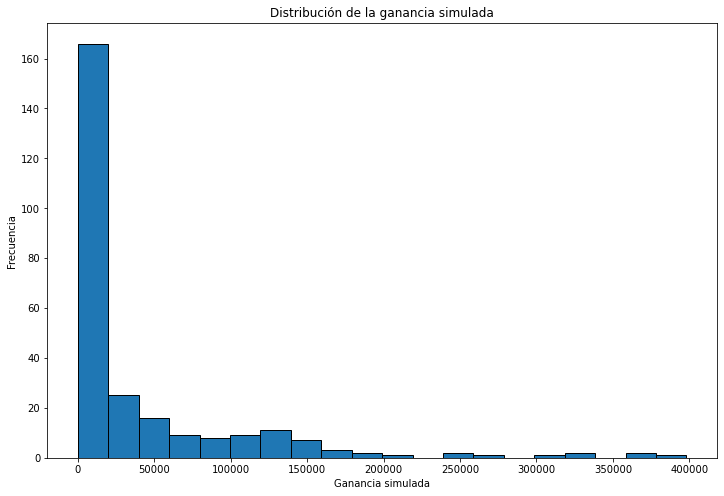

In [11]:
df['ganancia_simulada'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Ganancia simulada')
plt.ylabel('Frecuencia')
plt.title('Distribución de la ganancia simulada')
plt.show()

Text(0.5, 1.0, 'Relación entre demanda simulada vs. ganancia simulada')

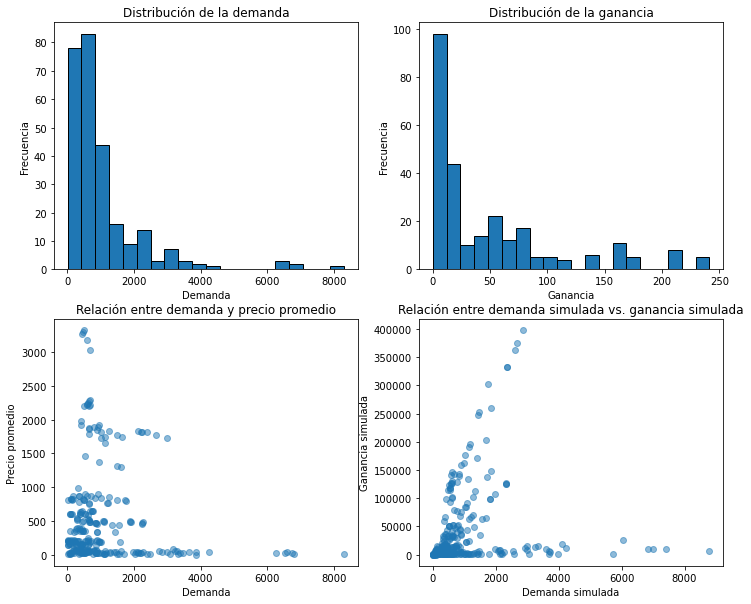

In [12]:
#Análisis exploratorio de datos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Histograma de la demanda
axs[0, 0].hist(df['demanda'], bins=20, edgecolor='black')
axs[0, 0].set_xlabel('Demanda')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_title('Distribución de la demanda')

#Histograma de la ganancia
axs[0, 1].hist(df['ganancia'], bins=20, edgecolor='black')
axs[0, 1].set_xlabel('Ganancia')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_title('Distribución de la ganancia')

#Scatter plot de demanda vs. precio promedio
axs[1, 0].scatter(df['demanda'], df['precio_promedio'], alpha=0.5)
axs[1, 0].set_xlabel('Demanda')
axs[1, 0].set_ylabel('Precio promedio')
axs[1, 0].set_title('Relación entre demanda y precio promedio')

#Scatter plot de demanda simulada vs. ganancia simulada
axs[1, 1].scatter(df['demanda_simulada'], df['ganancia_simulada'], alpha=0.5)
axs[1, 1].set_xlabel('Demanda simulada')
axs[1, 1].set_ylabel('Ganancia simulada')
axs[1, 1].set_title('Relación entre demanda simulada vs. ganancia simulada')

### Mostrar el data frame resultante

In [13]:
df

,ProductID,producto,demanda,precio_promedio,costo,precio_optimizado,ganancia,demanda_simulada,ganancia_simulada
0,925,"LL Mountain Frame - Black, 44",625,149.85,136.78,151.98,15.20,735.00,11170.77
1,902,"LL Touring Frame - Yellow, 58",36,200.05,199.85,222.06,22.21,37.00,821.61
2,710,"Mountain Bike Socks, L",90,5.70,3.40,3.77,0.38,99.00,37.36
3,879,All-Purpose Bike Stand,249,159.00,59.47,66.07,6.61,305.00,2015.24
4,733,"ML Road Frame - Red, 52",90,356.90,352.14,391.27,39.13,107.00,4186.55
...,...,...,...,...,...,...,...,...,...
261,741,"HL Mountain Frame - Silver, 48",173,818.70,706.81,785.35,78.53,164.00,12879.67
262,790,"Road-250 Red, 48",812,1886.63,1518.79,1687.54,168.75,764.00,128928.09
263,990,"Mountain-500 Black, 42",388,378.27,294.58,327.31,32.73,386.00,12634.20
264,933,HL Road Tire,858,32.60,12.19,13.55,1.35,692.00,937.46


## Cocnlcusiones

Después de este análisis, se llega a varias conclusiones importantes:

* Es posible utilizar el modelo de markup para optimizar los precios y maximizar las ganancias de los productos en una empresa.

* La simulación de la demanda utilizando una distribución normal puede ser útil para estimar la ganancia esperada para cada producto, considerando la incertidumbre en la demanda.

* La visualización de la distribución de la ganancia simulada para cada producto puede ser útil para identificar productos con una alta varianza en la ganancia esperada, lo que podría indicar la necesidad de tomar medidas para reducir la incertidumbre en la demanda o en los costos.

* El análisis proporciona información valiosa para la toma de decisiones en una empresa, como la determinación de los precios óptimos, la identificación de productos con alta varianza en la ganancia esperada y la estimación de la ganancia total de la empresa.

## Recomendaciones

Basándonos en las conclusiones del análisis, podemos hacer las siguientes recomendaciones:

* Es importante que la empresa implemente un sistema de seguimiento y análisis de la demanda para cada uno de sus productos. Esto puede ayudar a identificar los productos con alta varianza en la ganancia esperada y tomar medidas para reducir la incertidumbre en la demanda o en los costos asociados a ellos.

* La empresa puede utilizar el modelo de markup para optimizar los precios y maximizar las ganancias de sus productos. Esto puede ser particularmente útil si se dispone de información confiable sobre los costos y la demanda de cada producto.

* Se puede utilizar la simulación de la demanda para estimar la ganancia esperada para cada producto, considerando la incertidumbre en la demanda. Esta información puede ser útil para tomar decisiones informadas sobre la asignación de recursos y la planificación financiera.

* Es importante que la empresa realice un seguimiento regular de los resultados obtenidos y realice ajustes en función de los cambios en la demanda y los costos de los productos. Esto puede ayudar a garantizar que la empresa esté maximizando sus ganancias de manera eficiente y efectiva.

* Finalmente, se recomienda que la empresa invierta en herramientas y tecnologías adecuadas para el análisis y la gestión de datos. Esto puede ayudar a garantizar que la empresa tenga acceso a información precisa y oportuna sobre la demanda y los costos de sus productos, lo que a su vez puede ayudar a tomar decisiones más informadas y efectivas.